In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("../Nagpur_Weather_Data/new_weather_cleaned_csv.csv")
df 

,datetime,temp,tempmax,tempmin,humidity,pressure,cloudcover,visibility,windspeed_capped,precipprob,solarenergy,uvindex,month,precip_log,preciptype
0,2020-01-01,16.8,20.0,14.0,86.7,1017.7,62.3,1.9,13.0,100,5.9,3,1,2.541602,rain
1,2020-01-02,16.3,18.0,14.0,92.4,1018.6,58.9,1.9,14.8,100,6.9,4,1,3.627004,rain
2,2020-01-03,18.5,23.0,16.0,85.4,1017.0,50.6,2.0,9.4,0,11.1,5,1,0.000000,none
3,2020-01-04,18.1,22.0,15.0,87.7,1015.8,44.6,2.0,11.2,100,11.3,6,1,0.262364,rain
4,2020-01-05,17.6,23.0,13.5,66.1,1017.6,2.2,3.1,14.8,0,17.7,8,1,0.000000,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2024-12-27,23.7,28.5,19.5,84.1,1017.8,72.7,3.8,9.7,0,7.4,3,12,0.000000,none
1823,2024-12-28,24.4,30.3,20.0,76.1,1016.9,48.1,3.6,14.8,100,14.1,6,12,0.587787,rain
1824,2024-12-29,23.3,28.0,20.0,70.2,1017.9,48.7,4.2,7.6,100,13.1,7,12,0.262364,rain
1825,2024-12-30,23.1,28.0,19.0,72.6,1017.9,34.5,3.3,9.4,100,13.1,7,12,0.262364,rain


In [3]:
df.isnull().sum()

datetime            0
temp                0
tempmax             0
tempmin             0
humidity            0
pressure            0
cloudcover          0
visibility          0
windspeed_capped    0
precipprob          0
solarenergy         0
uvindex             0
month               0
precip_log          0
preciptype          0
dtype: int64

In [4]:
# 1️⃣ Encode target column
df['target'] = df['preciptype'].map({'rain': 1, 'none': 0})


In [5]:
df 

,datetime,temp,tempmax,tempmin,humidity,pressure,cloudcover,visibility,windspeed_capped,precipprob,solarenergy,uvindex,month,precip_log,preciptype,target
0,2020-01-01,16.8,20.0,14.0,86.7,1017.7,62.3,1.9,13.0,100,5.9,3,1,2.541602,rain,1
1,2020-01-02,16.3,18.0,14.0,92.4,1018.6,58.9,1.9,14.8,100,6.9,4,1,3.627004,rain,1
2,2020-01-03,18.5,23.0,16.0,85.4,1017.0,50.6,2.0,9.4,0,11.1,5,1,0.000000,none,0
3,2020-01-04,18.1,22.0,15.0,87.7,1015.8,44.6,2.0,11.2,100,11.3,6,1,0.262364,rain,1
4,2020-01-05,17.6,23.0,13.5,66.1,1017.6,2.2,3.1,14.8,0,17.7,8,1,0.000000,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2024-12-27,23.7,28.5,19.5,84.1,1017.8,72.7,3.8,9.7,0,7.4,3,12,0.000000,none,0
1823,2024-12-28,24.4,30.3,20.0,76.1,1016.9,48.1,3.6,14.8,100,14.1,6,12,0.587787,rain,1
1824,2024-12-29,23.3,28.0,20.0,70.2,1017.9,48.7,4.2,7.6,100,13.1,7,12,0.262364,rain,1
1825,2024-12-30,23.1,28.0,19.0,72.6,1017.9,34.5,3.3,9.4,100,13.1,7,12,0.262364,rain,1


In [6]:
# 2️⃣ Define feature matrix X (drop target & original label)
X = df.drop(columns=['preciptype', 'target'])

In [7]:
X

,datetime,temp,tempmax,tempmin,humidity,pressure,cloudcover,visibility,windspeed_capped,precipprob,solarenergy,uvindex,month,precip_log
0,2020-01-01,16.8,20.0,14.0,86.7,1017.7,62.3,1.9,13.0,100,5.9,3,1,2.541602
1,2020-01-02,16.3,18.0,14.0,92.4,1018.6,58.9,1.9,14.8,100,6.9,4,1,3.627004
2,2020-01-03,18.5,23.0,16.0,85.4,1017.0,50.6,2.0,9.4,0,11.1,5,1,0.000000
3,2020-01-04,18.1,22.0,15.0,87.7,1015.8,44.6,2.0,11.2,100,11.3,6,1,0.262364
4,2020-01-05,17.6,23.0,13.5,66.1,1017.6,2.2,3.1,14.8,0,17.7,8,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2024-12-27,23.7,28.5,19.5,84.1,1017.8,72.7,3.8,9.7,0,7.4,3,12,0.000000
1823,2024-12-28,24.4,30.3,20.0,76.1,1016.9,48.1,3.6,14.8,100,14.1,6,12,0.587787
1824,2024-12-29,23.3,28.0,20.0,70.2,1017.9,48.7,4.2,7.6,100,13.1,7,12,0.262364
1825,2024-12-30,23.1,28.0,19.0,72.6,1017.9,34.5,3.3,9.4,100,13.1,7,12,0.262364


In [8]:
# 3️⃣ Define target vector y
y = df['target']

In [9]:
y

0       1
1       1
2       0
3       1
4       0
       ..
1822    0
1823    1
1824    1
1825    1
1826    0
Name: target, Length: 1827, dtype: int64

In [10]:
X.shape

(1827, 14)

In [11]:
y.shape

(1827,)

In [12]:
y.value_counts()

target
0    980
1    847
Name: count, dtype: int64

In [13]:
X.head()

,datetime,temp,tempmax,tempmin,humidity,pressure,cloudcover,visibility,windspeed_capped,precipprob,solarenergy,uvindex,month,precip_log
0,2020-01-01,16.8,20.0,14.0,86.7,1017.7,62.3,1.9,13.0,100,5.9,3,1,2.541602
1,2020-01-02,16.3,18.0,14.0,92.4,1018.6,58.9,1.9,14.8,100,6.9,4,1,3.627004
2,2020-01-03,18.5,23.0,16.0,85.4,1017.0,50.6,2.0,9.4,0,11.1,5,1,0.000000
3,2020-01-04,18.1,22.0,15.0,87.7,1015.8,44.6,2.0,11.2,100,11.3,6,1,0.262364
4,2020-01-05,17.6,23.0,13.5,66.1,1017.6,2.2,3.1,14.8,0,17.7,8,1,0.000000


In [14]:
# 1️⃣ Drop datetime (not useful for Logistic Regression)
X_lr = X.drop(columns=['datetime'])

In [15]:
from sklearn.model_selection import train_test_split
# 2️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_lr, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
from sklearn.preprocessing import MinMaxScaler
# 3️⃣ Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = lr_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [20]:
y_test

310     0
833     1
888     0
1658    1
1694    1
       ..
1065    0
1177    0
533     1
1098    0
1341    1
Name: target, Length: 366, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Accuracy:", accuracy_score(y_test, y_pred)*100)

✅ Accuracy: 100.0


In [22]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       170

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



In [23]:
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🔹 Confusion Matrix:
[[196   0]
 [  0 170]]


In [24]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Map back to labels for better understanding
comparison_df['Actual_Label'] = comparison_df['Actual'].map({1: 'rain', 0: 'none'})
comparison_df['Predicted_Label'] = comparison_df['Predicted'].map({1: 'rain', 0: 'none'})

# Show first 20 predictions
print("🔹 Actual vs Predicted (Sample):")
display(comparison_df.head(10))

🔹 Actual vs Predicted (Sample):


,Actual,Predicted,Actual_Label,Predicted_Label
0,0,0,none,none
1,1,1,rain,rain
2,0,0,none,none
3,1,1,rain,rain
4,1,1,rain,rain
5,0,0,none,none
6,1,1,rain,rain
7,0,0,none,none
8,1,1,rain,rain
9,0,0,none,none


# Decision tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier


In [26]:
dt_model = DecisionTreeClassifier(
    max_depth=6,          # tree ko overfit hone se bachata hai
    random_state=42
)


In [27]:
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [29]:
y_test

310     0
833     1
888     0
1658    1
1694    1
       ..
1065    0
1177    0
533     1
1098    0
1341    1
Name: target, Length: 366, dtype: int64

In [30]:

print("✅ Accuracy:", accuracy_score(y_test, y_pred_dt)*100)


✅ Accuracy: 99.72677595628416


In [31]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_dt))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       0.99      1.00      1.00       170

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



In [32]:
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


🔹 Confusion Matrix:
[[195   1]
 [  0 170]]


In [33]:
# Actual vs Predicted comparison
comparison_dt = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_dt
})

comparison_dt['Actual_Label'] = comparison_dt['Actual'].map({1: 'rain', 0: 'none'})
comparison_dt['Predicted_Label'] = comparison_dt['Predicted'].map({1: 'rain', 0: 'none'})

display(comparison_dt.head(5))


,Actual,Predicted,Actual_Label,Predicted_Label
0,0,0,none,none
1,1,1,rain,rain
2,0,0,none,none
3,1,1,rain,rain
4,1,1,rain,rain


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=10,          # control overfitting
    random_state=42,
    n_jobs=-1              # use all cores
)

In [36]:
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_rf = rf_model.predict(X_test)

In [38]:
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf)*100)

✅ Random Forest Accuracy: 100.0


In [39]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       170

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



In [40]:
print(confusion_matrix(y_test,y_pred_rf))

[[196   0]
 [  0 170]]


# Support Vector Classifier 

In [41]:
from sklearn.svm import SVC

In [42]:
svc_model = SVC(kernel='rbf',C=1.0,gamma='Scale',random_state=42)

In [43]:
# 4️⃣ Support Vector Classifier
svc_model = SVC(
    kernel='rbf',      # non-linear boundary
    C=1.0,
    gamma='scale',
    random_state=42
)

In [44]:
svc_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
y_pred_svc = svc_model.predict(X_test_scaled)

In [46]:
print("✅ SVC Accuracy:", accuracy_score(y_test, y_pred_svc)*100)

✅ SVC Accuracy: 100.0


In [47]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_svc))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       170

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



In [48]:
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))


🔹 Confusion Matrix:
[[196   0]
 [  0 170]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski'
)

In [51]:
knn_model.fit(X_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [53]:
print("✅ KNN Accuracy:", accuracy_score(y_test, y_pred_knn)*100)

✅ KNN Accuracy: 100.0


In [54]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_knn))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       170

    accuracy                           1.00       366
   macro avg       1.00      1.00      1.00       366
weighted avg       1.00      1.00      1.00       366



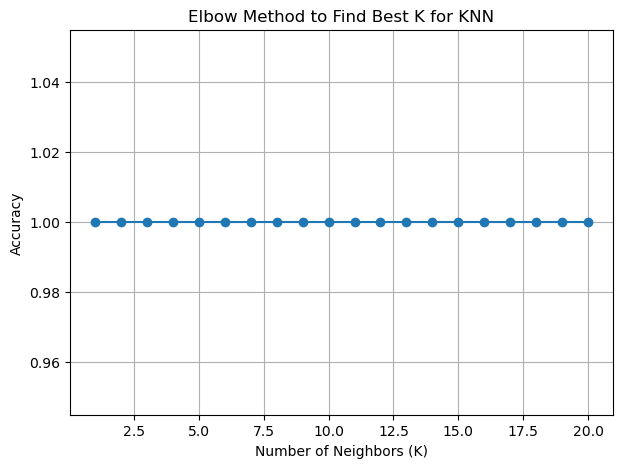

✅ Best K: 1
✅ Best Accuracy: 1.0


In [55]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

# Plot Elbow Curve
plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Elbow Method to Find Best K for KNN")
plt.grid(True)
plt.show()

# Print best K
best_k = k_values[accuracies.index(max(accuracies))]
print("✅ Best K:", best_k)
print("✅ Best Accuracy:", max(accuracies))


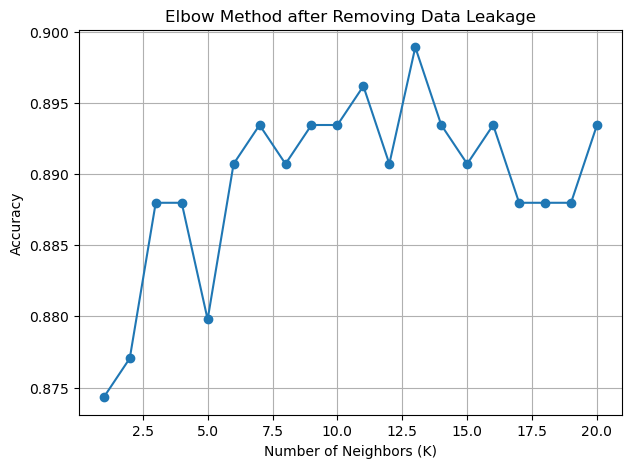

✅ Best K: 13
✅ Best Accuracy: 89.89071038251366


In [57]:
# Step 1: Drop datetime (already done earlier for KNN)
X_knn = X.drop(columns=['datetime'])

# Step 2: Remove leakage columns
X_knn_safe = X_knn.drop(columns=['precipprob', 'precip_log'])

# Step 3: Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X_knn_safe, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Scaling (mandatory for KNN)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Elbow Method
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Step 6: Plot
plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Elbow Method after Removing Data Leakage")
plt.grid(True)
plt.show()

# Best K
best_k = k_values[accuracies.index(max(accuracies))]
print("✅ Best K:", best_k)
print("✅ Best Accuracy:", max(accuracies)*100)
